<a href="https://colab.research.google.com/github/ChintzRuparel/Computer-Vision/blob/main/Experiment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aim - To determine corner edges using corner detection for image - Window.jpg

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.io import imread

(148, 148, 3)

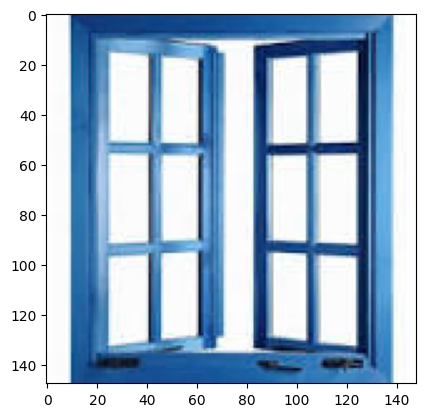

In [40]:
img= cv2.imread('window.jpg')
plt.imshow(img)
img.shape


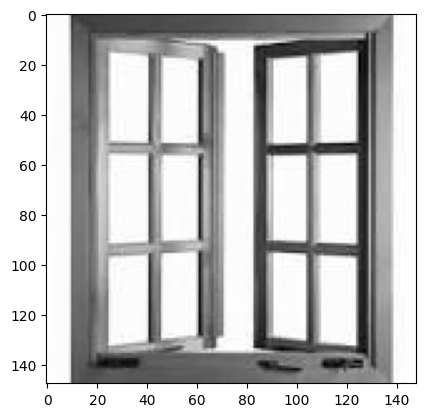

In [41]:
#Converting image to gray
img_g=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img_g,cmap='gray')

In [42]:
#finding out the gradients by applying sobel filter
[rows,cols]=img_g.shape
g_h=cv2.Sobel(img_g,cv2.CV_32F,1,0,ksize=3)
g_v=cv2.Sobel(img_g,cv2.CV_32F,0,1,ksize=3)

In [43]:
#window size 3
sz = 3

border = int((sz-1)/2)
K = 0.04
R_matrix = np.zeros((rows,cols))

#calculate harris matrix
for r in range(border,rows-border):
  for c in range(border,cols-border):
    sum_ghs = np.sum(g_h_s[r-border:r+1+border,c-border:c+1+border])
    sum_gvs = np.sum(g_v_s[r-border:r+1+border,c-border:c+1+border])
    sum_ghv = np.sum(g_hv[r-border:r+1+border,c-border:c+1+border])
    H = np.array([[sum_ghs,sum_ghv],[sum_ghv,sum_gvs]])
    #calculate corner point
    det_H = (sum_ghs*sum_gvs) - (sum_ghv*sum_ghv)
    trace_H = sum_ghs + sum_gvs
    R = det_H-K*trace_H
    R_matrix[r,c] = R

R_matrix[3,3]


-3.84

In [44]:
R_matrix[3,3]

-3.84

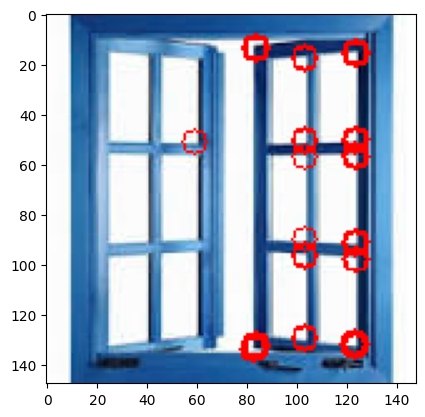

In [45]:
corners = []
th = 0.3
R_norm = cv2.normalize(R_matrix,None,0,1,cv2.NORM_MINMAX)
img_c=img.copy()

for r in range(border,rows-border):
  for c in range(border,cols-border):
    temp = R_norm[r,c]
    if temp > th:
      corners.append([r,c,temp])
      cv2.circle(img_c,(c,r),5,(255,0,0),1)


      plt.imshow(img_c,cmap="gray")

#Conclusion

Number of corners identified for threshold of 0.4 is equal to 28, If threshold is reduced to 0.1 number of corner points increase to 196.